GMM的模型构成为：
p(x)=∑_j^m▒〖p(x│z=j)p(z=j)〗
x|z=j ~ N(u_j, Σ_j)，m个高斯分布，u_j, Σ_j 分别为每个高斯分布的均值和标准差
z ~ Multinomial(ϕ)，多项分布，
x是observed variables，z是latent variables

模型通过EM算法进行优化求解参数的最优值。
将模型拟合后，可以得到模型的各个最优参数值。

模型包含1个超参数：
m, Gaussian的个数 对应sklearn API 的 n_components


In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

生成数据

In [66]:
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), cluster_std=1.0, random_state=42)
# X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=((6, -8), ), cluster_std=1.0, random_state=42)
X = np.r_[X1, X2]
y = np.r_[y1, y2]

X1的feature数目为2，内含2个cluster，std均为1.0，中心点坐标为：

In [72]:
# center1 = np.array(((10, -10), (0, 0))) @ np.array([[0.374, 0.95], [0.732, 0.598]])
center1 = np.array(((4, -4), (0, 0)))
print(center1)

[[ 4 -4]
 [ 0  0]]


X2的feature数目为2，内含1个cluster，std为1.0，中心点坐标为：

In [73]:
center2 = np.array((6, -8))[np.newaxis, :]
center2

array([[ 6, -8]])

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x220348f3160>])

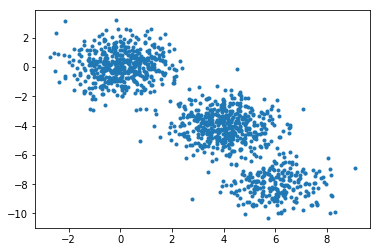

In [67]:
def plot_point(X):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    point = ax.plot(X[:, 0], X[:, 1], '.')
    return fig, ax, point
plot_point(X)

In [68]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

ϕ 求解为每一个mixture component的sample所占比例

In [69]:
gm.weights_ 

array([0.40262035, 0.19794061, 0.39943904])

可以求出每个高斯分布的均值和标准差，可以看到跟数据实际的均值和方差很接近了

In [70]:
gm.means_

array([[ 4.00782288, -3.97084737],
       [ 6.00791078, -8.0115578 ],
       [ 0.06065443,  0.08100889]])

In [71]:
gm.covariances_

array([[[ 0.95146257, -0.03923598],
        [-0.03923598,  1.01185461]],

       [[ 0.99184045,  0.00795452],
        [ 0.00795452,  0.87050362]],

       [[ 0.90947639,  0.03096828],
        [ 0.03096828,  1.07346461]]])

求解总体的p(x)（实际求的是log⁡(p(x)）

In [63]:
pdf = gm.score_samples
pdf(X), np.exp(pdf(X))

(array([-2.6078798 , -3.55326682, -3.35520996, ..., -3.88886764,
        -4.07665521, -3.54487534]),
 array([0.07369062, 0.02863095, 0.03490204, ..., 0.02046851, 0.01696411,
        0.02887222]))

这是3个中心点的pdf

In [74]:
np.exp(pdf(center1)), np.exp(pdf(center2))

(array([7.69195177e-07, 1.35630885e-01]), array([0.03314248]))